In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:09<00:00, 24.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


In [ ]:
import os
import PIL as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

print('modules loaded')

modules loaded


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Reading The Dataset
data_dir='/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1'
filepath=[]
labels=[]
folds=os.listdir(data_dir)
for fold in folds:
    file_path=os.path.join(data_dir,fold)
    if not os.path.isdir(file_path): # if not a directory, skip
        continue
    fpath = os.listdir(file_path)

    for f in fpath:
        fil_path=os.path.join(file_path,f)
        filepath.append(fil_path)
        labels.append(fold)

f_series=pd.Series(filepath,name='filepaths')
l_series=pd.Series(labels,name='labels')
df=pd.concat([f_series, l_series], axis= 1)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

# Update dataset_path using the downloaded path
dataset_path = os.path.join(path, "Rice_Image_Dataset") #This joins the root path from kagglehub with the name of the Dataset folder.

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


In [ ]:
#Creating Image Data Genearator (data augmentation)
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %%
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

# Update dataset_path using the downloaded path
dataset_path = os.path.join(path, "Rice_Image_Dataset") #This joins the root path from kagglehub with the name of the Dataset folder.

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})
# %%
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

# Make sure to import train_test_split if not already imported
from sklearn.model_selection import train_test_split

# Split the DataFrame before creating the generator
train_df, dummy_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(dummy_df, test_size=0.5, random_state=42, stratify=dummy_df['label'])

# Use 'image' instead of 'filepaths' for x_col
train_gen = tr_gen.flow_from_dataframe(train_df, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

# Use 'image' instead of 'filepaths' for x_col
valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                        color_mode='rgb', shuffle=True, batch_size=batch_size)

# Use 'image' instead of 'filepaths' for x_col
test_gen = ts_gen.flow_from_dataframe(test_df, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)

100%|██████████| 219M/219M [00:11<00:00, 20.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1
Found 60000 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


In [ ]:
df.head()

,image,label
0,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
1,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
2,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
3,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
4,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine


In [ ]:
#EDA
df['label'].value_counts().sort_index()

,count
label,
Arborio,15000
Basmati,15000
Ipsala,15000
Jasmine,15000
Karacadag,15000


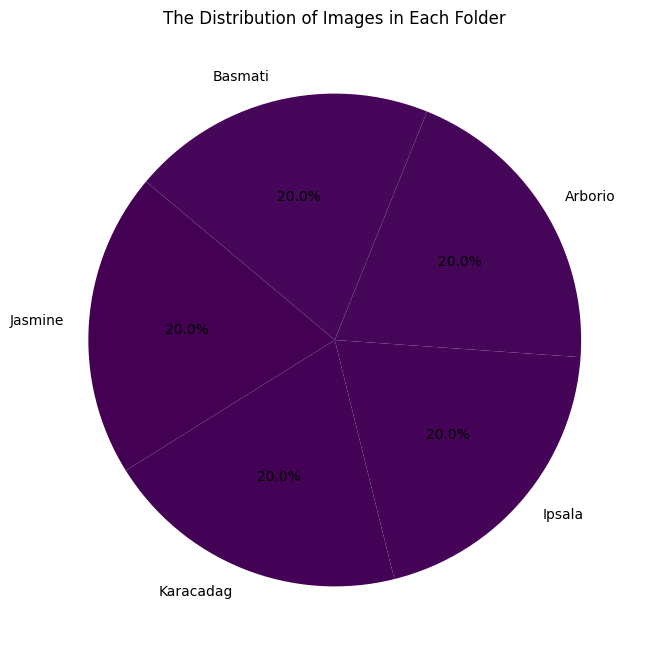

In [ ]:
import matplotlib.pyplot as plt

# Get label counts
labels = df['label'].value_counts().index
counts = df['label'].value_counts().values

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages
    colors=plt.cm.viridis.colors,  # Use the viridis colormap for colors
    startangle=140  # Rotate the start angle
)
plt.title('The Distribution of Images in Each Folder')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with 'image' and 'label' columns
X = df['image']  # Image paths
y = df['label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can use y_train
len(y_train)

60000

In [ ]:
model_1 = Sequential()

In [ ]:
# Assuming you want to use X_train and X_test from the train_test_split

# Option 1: Use X_train directly and a part of X_test as validation set
x_train = np.expand_dims(X_train, axis=-1)
# Create x_val from X_test (e.g., first 20% of X_test)
x_val = np.expand_dims(X_test[:int(0.2 * len(X_test))], axis=-1)
y_val = y_test[:int(0.2 * len(y_test))]
# Option 2: Create a validation split from X_train
# Assuming you want to use 20% of X_train as validation set
x_train, x_val, _, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

print(x_train.shape)
print(x_val.shape)

(48000, 1)
(12000, 1)


In [ ]:
from tensorflow.keras.models import Sequential #already imported in the beginning
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout #Updated here

# ... (Rest of the code) ...

model_1 = Sequential()
model_1.add(Conv2D(filters = 16 , kernel_size = (3,3) , input_shape = (50,50,1) ,activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2))) #Using the imported MaxPooling2D

# ... (Rest of the code) ...

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Import

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with 'image' and 'label' columns
X = df['image']  # Image paths
y = df['label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# --- Updated code ---
# Load and preprocess images for training and validation sets
def load_and_preprocess_images(image_paths):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=(50, 50), color_mode='grayscale')  # Load as grayscale
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

x_train = load_and_preprocess_images(X_train)
x_test = load_and_preprocess_images(X_test)
x_val = load_and_preprocess_images(X_test[:int(0.2 * len(X_test))])  # Using a portion of X_test for validation
y_val = y_test[:int(0.2 * len(y_test))]

# Convert labels to numerical format if they are not already
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)
# --- End of updated code ---

print(x_train.shape)
print(x_val.shape)

(60000, 50, 50, 1)
(3000, 50, 50, 1)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 152s 298ms/step - accuracy: 0.8628 - loss: 0.6033 - val_accuracy: 0.9727 - val_loss: 0.0854
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 291ms/step - accuracy: 0.9684 - loss: 0.0929 - val_accuracy: 0.9687 - val_loss: 0.0964
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 293ms/step - accuracy: 0.9733 - loss: 0.0776 - val_accuracy: 0.9803 - val_loss: 0.0624
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 204s 296ms/step - accuracy: 0.9767 - loss: 0.0686 - val_accuracy: 0.9763 - val_loss: 0.0664
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 294ms/step - accuracy: 0.9774 - loss: 0.0655 - val_accuracy: 0.9780 - val_loss: 0.0646
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 296ms/step - accuracy: 0.9805 - loss: 0.0572 - val_accuracy: 0.9800 - val_loss: 0.0604
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 296ms/step - accuracy: 0.9823 - loss: 0.0513 - val_accuracy: 0.9813 - val_loss: 0.0575
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 292ms/step - accuracy: 

<Axes: >

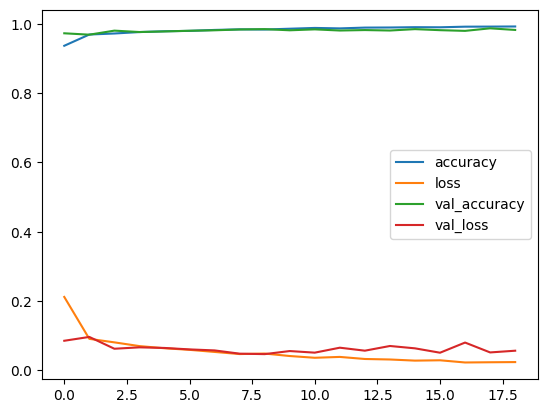

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# Define the model
model_1 = Sequential()
model_1.add(Conv2D(filters = 16 , kernel_size = (3,3) , input_shape = (50,50,1) ,activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Conv2D(32, (5, 5), activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Conv2D(64, (5, 5), activation='relu'))

model_1.add(Flatten())

model_1.add(Dense(100 , activation = 'relu'))
model_1.add(Dense(150 , activation = 'relu'))
model_1.add(Dense(200 , activation = 'relu'))
model_1.add(Dense(150 , activation = 'relu'))
model_1.add(Dense(100 , activation = 'relu'))
model_1.add(Dense(5 , activation = 'softmax'))

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ... (Your code to load and preprocess data: x_train, y_train, x_val, y_val) ...

# Train the model with EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model_1.fit(x_train ,y_train,validation_data =(x_val ,y_val) ,epochs=100
          ,batch_size = 120 ,callbacks=[early_stopping] )

# Plot the training history
Results_1 = pd.DataFrame(history.history)
Results_1.plot()

In [ ]:
# Define the model (cell 1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model_1 = Sequential()
model_1.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(50, 50, 1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(5, activation='softmax'))

# Compile the model (cell 2)
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ... Load and preprocess data (cells 3, 4, etc.) ...

# Train the model (cell 5)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_1.fit(x_train ,y_train,validation_data =(x_val ,y_val) ,epochs=100
          ,batch_size = 120 ,callbacks=[early_stopping] )

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 100ms/step - accuracy: 0.8630 - loss: 1.9593 - val_accuracy: 0.9427 - val_loss: 0.3166
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 101ms/step - accuracy: 0.9558 - loss: 0.2365 - val_accuracy: 0.9580 - val_loss: 0.2044
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.9622 - loss: 0.1580 - val_accuracy: 0.9623 - val_loss: 0.1552
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9671 - loss: 0.1134 - val_accuracy: 0.9590 - val_loss: 0.1610
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9712 - loss: 0.0908 - val_accuracy: 0.9560 - val_loss: 0.1608
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9759 - loss: 0.0756 - val_accuracy: 0.9610 - val_loss: 0.1249
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.9763 - loss: 0.0691 - val_accuracy: 0.9643 - val_loss: 0.1121
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 86s 107ms/step - accuracy: 0.9787 - loss

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_1.fit(x_train ,y_train,validation_data =(x_val ,y_val) ,epochs=100
          ,batch_size = 120 ,callbacks=[early_stopping] )

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 97ms/step - accuracy: 0.9832 - loss: 0.0473 - val_accuracy: 0.9623 - val_loss: 0.1376
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.9832 - loss: 0.0457 - val_accuracy: 0.9620 - val_loss: 0.1412
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.9832 - loss: 0.0459 - val_accuracy: 0.9600 - val_loss: 0.1647
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.9842 - loss: 0.0464 - val_accuracy: 0.9640 - val_loss: 0.1426
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.9838 - loss: 0.0453 - val_accuracy: 0.9593 - val_loss: 0.1579
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9853 - loss: 0.0423 - val_accuracy: 0.9637 - val_loss: 0.1494
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 98ms/step - accuracy: 0.9852 - loss: 0.0399 - val_accuracy: 0.9597 - val_loss: 0.1742
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.9871 - loss:

In [ ]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 48, 48, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385,861 (1.47 MB)

 Trainable params: 385,861 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
predictions=model_1.predict(x_test)
predictions

469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step


array([[4.66269853e-07, 1.03221757e-33, 0.00000000e+00, 8.08863410e-25,
        9.99999464e-01],
       [6.79289913e-09, 1.68283332e-05, 5.25684773e-10, 9.99983132e-01,
        4.17184551e-11],
       [7.24243250e-07, 8.60580369e-33, 0.00000000e+00, 5.57131318e-24,
        9.99999225e-01],
       ...,
       [4.68548977e-10, 0.00000000e+00, 0.00000000e+00, 1.86120589e-35,
        9.99999940e-01],
       [9.22399324e-10, 0.00000000e+00, 0.00000000e+00, 1.50983502e-34,
        9.99999940e-01],
       [9.98767734e-01, 1.02921754e-10, 3.76181447e-06, 1.03550781e-06,
        1.22738269e-03]], dtype=float32)

In [ ]:
pred = []
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))
z= np.array(pred)

In [ ]:
prediction = pd.DataFrame(z ,columns =['Y_pred' ])
prediction ['Y_test'] = y_test

In [ ]:
prediction

,Y_pred,Y_test
0,4,4
1,3,3
2,4,4
3,1,1
4,1,1
...,...,...
14995,0,0
14996,4,4
14997,4,4
14998,4,4


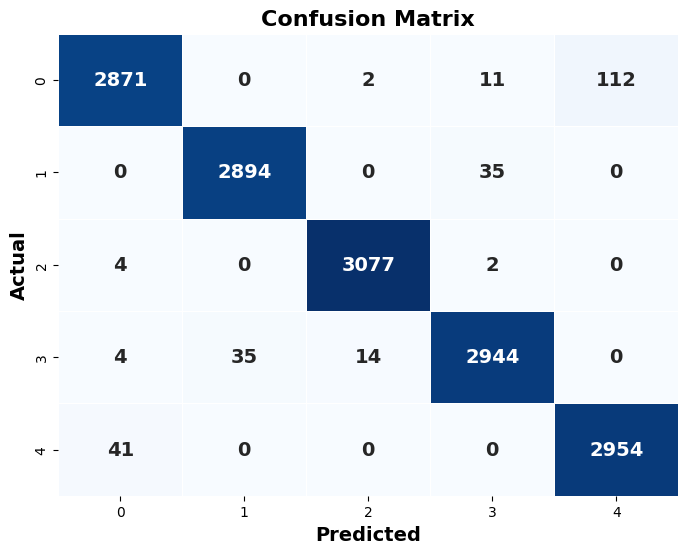

In [ ]:
confusion = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2996
           1       0.99      0.99      0.99      2929
           2       0.99      1.00      1.00      3083
           3       0.98      0.98      0.98      2997
           4       0.96      0.99      0.97      2995

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



In [ ]:
from sklearn.metrics import classification_report

# Assuming your class labels are stored in df['label'].unique()
class_names = df['label'].unique()

# Use 'pred' instead of 'predicted_classes'
print(classification_report(y_test, pred, target_names=class_names))
# class_names is a list of your class labels

              precision    recall  f1-score   support

     Jasmine       0.98      0.96      0.97      2996
   Karacadag       0.99      0.99      0.99      2929
      Ipsala       0.99      1.00      1.00      3083
     Arborio       0.98      0.98      0.98      2997
     Basmati       0.96      0.99      0.97      2995

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000

